<a href="https://colab.research.google.com/github/envirodatascience/final-project-biodiversity/blob/main/ENV_617_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Redlining and Biodiversity

The Home Owners' Loan Corporation (HOLC) grades were a system used in the 1930s to assess the riskiness of neighborhoods for mortgage lending. These grades, assigned on maps, ranged from A (Best) to D (Hazardous), and were a key tool in the practice of redlining, which denied mortgages and other economic opportunities to majority minority neighborhoods, particularly predominantly Black neighborhoods. HOLC grades were overtly racist as they used racial factors to assess the "security" of neighborhoods, leading to discriminatory practices in mortgage lending and thus depriving minority neighborhoods from economic investment.

Since greenlined neighborhoods (A- and B-neighborhoods)  were deemed worthy of economic investment they have traditionally ended up with higher vegetation, green space, and canopy cover which has shaped environmental quality in cities as well as the ecology of cities. Our hypothesis is that this higher environmental quality and vegetation resulting from greenlined neighborhoods having higher economic investment would increase the number of species that would find these neighborhoods habitable. The goal of this project is to investigate the legacy effects of redlining (C- and D- neighborhoods) and if one of the legacy effects of redlining is a lower biodiversity. We intend to not only see if this relationship exists but create a method to quantify it.

To explore the relationship between redlining and biodiversity we will choose 3 cities as case studies and then compare the results between them. The 3 cities we are choosing are New Haven, San Francisco, and San Diego. We chose New Haven because it is a city we all should be very familiar with and have an intuitive idea of its neighborhoods. We then chose San Francisco and Los Angeles to create a comparison between 2 prominent California cities.

There are multiple methods to quanitfy biodiversity but we will be using species richness for this project. Species richness is the number of unique species in an area. Since all of the HOLC neighborhoods have a different area and a larger neighborhood might have a greater species richness just because of its size enabling more observations, we will try to adjust this bias by calculating the species richness per square kilometer. We will then categorize each neighborhood as either having 'Low', 'Medium-Low', 'Medium-High', or 'High' biodiversity based on quartiles of the species richness per square kilometer. We opted to use quartiles instead of means because of the effect that outliers can have on the data. Quartiles will enable to count how many neighborhoods in each grade fall into each of the biodiversity categories.

The questions we intend to answer with our project:
* Is there a relationship between redlining and biodiversity?
* Do A-neighborhoods have higher biodiversity than D-neighborhoods?

# Description of Data Sources

1. Our source for redlining data will be the Mapping Inequality project from the University of Richmond. The link to the project is https://dsl.richmond.edu/panorama/redlining/data/CA-SanFrancisco. We downloaded the HOLC data for the cities of New Haven, San Francisco, and San Diego. HOLC grades are only assigned to residential neighborhoods only and does not include any commercial and industrial areas. We will be making use of the neighborhood geometries and the HOLC grade assigned to each residential neighborhood.

2. Our data source to calculate species richness will be the Global Biodiversity Information Facility (GBIF) and we will be only making use of the iNaturalist research-grade observations dataset. The link to GBIF is https://www.gbif.org/occurrence/search?occurrence_status=present. We applied the following filters for observations:
* From January 2019 to December 2024 (5 years)
* The Mammalia, Aves, Reptilia, Amphibia, Insecta, and Arachnida taxon classes


We downloaded these datasets and uploaded them to our GitHub repository to be able to access them through a GitHub link.


# Importing our Data

Before importing our data, we must import essential packages.

In [ ]:
!pip install contextily
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import shapely
import math

from plotnine import *
import plotnine
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap
import contextily as ctx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 12.2 MB/s eta 0:00:00


To start, we will read in our HOLC maps for our chosen cities though a GitHub link. We will then explore what columns the dataset contains and which ones are not needed.

In [ ]:
nh_holc = gpd.read_file('https://raw.githubusercontent.com/envirodatascience/final-project-biodiversity/refs/heads/data/new_haven_holc.json')
nh_holc.head()

,area_id,city_id,grade,fill,label,name,category_id,sheets,area,bounds,residential,commercial,industrial,geometry
0,3569,27,A,#76a865,A1,,1,1.0,0.000033,"[ [ 41.364930000000001, -72.90804 ], [ 41.3710...",True,False,False,"MULTIPOLYGON (((-72.9 41.36885, -72.90325 41.3..."
1,3568,27,A,#76a865,A2,,1,1.0,0.000024,"[ [ 41.363309999999998, -72.901020000000003 ],...",True,False,False,"MULTIPOLYGON (((-72.89401 41.36331, -72.89256 ..."
2,3566,27,A,#76a865,A3,,1,1.0,0.000099,"[ [ 41.357950000000002, -72.918390000000002 ],...",True,False,False,"MULTIPOLYGON (((-72.90981 41.35949, -72.90284 ..."
3,3567,27,A,#76a865,A4,,1,1.0,0.000032,"[ [ 41.357120000000002, -72.902839999999998 ],...",True,False,False,"MULTIPOLYGON (((-72.90284 41.35795, -72.8999 4..."
4,3564,27,A,#76a865,A5,,1,1.0,0.000081,"[ [ 41.338450000000002, -72.909760000000006 ],...",True,False,False,"MULTIPOLYGON (((-72.89801 41.3493, -72.89883 4..."


In [ ]:
sf_holc = gpd.read_file('https://raw.githubusercontent.com/envirodatascience/final-project-biodiversity/refs/heads/data/san_francisco_holc.json')
sf_holc.head()

,area_id,city_id,grade,fill,label,name,category_id,sheets,area,bounds,residential,commercial,industrial,geometry
0,758,20,B,#7cb5bd,,,2,0,0.000352,"[ [ 37.73348, -122.50662 ], [ 37.7589299999999...",True,False,False,"MULTIPOLYGON (((-122.46477 37.741, -122.46436 ..."
1,811,20,C,#ffff00,,,3,0,0.000009,"[ [ 37.727249999999998, -122.4747 ], [ 37.7310...",True,False,False,"MULTIPOLYGON (((-122.4747 37.73095, -122.47469..."
2,717,20,A,#76a865,A1,,1,1,0.000053,"[ [ 37.783430000000003, -122.49366000000001 ],...",True,False,False,"MULTIPOLYGON (((-122.47554 37.78687, -122.4764..."
3,772,20,A,#76a865,A10,,1,1,0.000048,"[ [ 37.733069999999998, -122.47154999999999 ],...",True,False,False,"MULTIPOLYGON (((-122.46089 37.73566, -122.4613..."
4,777,20,A,#76a865,A11,,1,1,0.000033,"[ [ 37.734200000000001, -122.46145 ], [ 37.741...",True,False,False,"MULTIPOLYGON (((-122.45619 37.74046, -122.4568..."


In [ ]:
sd_holc = gpd.read_file('https://raw.githubusercontent.com/envirodatascience/final-project-biodiversity/refs/heads/data/san_diego_holc.json')
sd_holc.head()

,area_id,city_id,grade,fill,label,name,category_id,sheets,area,bounds,residential,commercial,industrial,geometry
0,703,19,B,#7cb5bd,,,2,0,0.000158,"[ [ 32.778590000000001, -117.25411 ], [ 32.796...",True,False,False,"MULTIPOLYGON (((-117.23115 32.7939, -117.23189..."
1,704,19,B,#7cb5bd,,,2,0,0.000095,"[ [ 32.707769999999996, -117.24914 ], [ 32.723...",True,False,False,"MULTIPOLYGON (((-117.24243 32.70783, -117.2386..."
2,705,19,B,#7cb5bd,,,2,0,0.000130,"[ [ 32.719160000000002, -117.25776999999999 ],...",True,False,False,"MULTIPOLYGON (((-117.24978 32.73303, -117.2556..."
3,706,19,A,#76a865,,,1,0,0.000062,"[ [ 32.823860000000003, -117.27513999999999 ],...",True,False,False,"MULTIPOLYGON (((-117.2627 32.83302, -117.26343..."
4,707,19,A,#76a865,,,1,0,0.000113,"[ [ 32.81973, -117.26621 ], [ 32.8433300000000...",True,False,False,"MULTIPOLYGON (((-117.26457 32.81973, -117.2592..."


Each of the HOLC dataframes have a lot of columns so we will select only the necessary ones. We will also remove all rows that don't have a grade.

In [ ]:
nh_holc = nh_holc[['area_id', 'grade', 'area', 'geometry']].dropna(subset='grade')
nh_holc.head()

,area_id,grade,area,geometry
0,3569,A,0.000033,"MULTIPOLYGON (((-72.9 41.36885, -72.90325 41.3..."
1,3568,A,0.000024,"MULTIPOLYGON (((-72.89401 41.36331, -72.89256 ..."
2,3566,A,0.000099,"MULTIPOLYGON (((-72.90981 41.35949, -72.90284 ..."
3,3567,A,0.000032,"MULTIPOLYGON (((-72.90284 41.35795, -72.8999 4..."
4,3564,A,0.000081,"MULTIPOLYGON (((-72.89801 41.3493, -72.89883 4..."


In [ ]:
sf_holc = sf_holc[['area_id', 'grade', 'area', 'geometry']].dropna(subset='grade')
sf_holc.head()

,area_id,grade,area,geometry
0,758,B,0.000352,"MULTIPOLYGON (((-122.46477 37.741, -122.46436 ..."
1,811,C,0.000009,"MULTIPOLYGON (((-122.4747 37.73095, -122.47469..."
2,717,A,0.000053,"MULTIPOLYGON (((-122.47554 37.78687, -122.4764..."
3,772,A,0.000048,"MULTIPOLYGON (((-122.46089 37.73566, -122.4613..."
4,777,A,0.000033,"MULTIPOLYGON (((-122.45619 37.74046, -122.4568..."


In [ ]:
sd_holc = sd_holc[['area_id', 'grade', 'area', 'geometry']].dropna(subset='grade')
sd_holc.head()

,area_id,grade,area,geometry
0,703,B,0.000158,"MULTIPOLYGON (((-117.23115 32.7939, -117.23189..."
1,704,B,0.000095,"MULTIPOLYGON (((-117.24243 32.70783, -117.2386..."
2,705,B,0.000130,"MULTIPOLYGON (((-117.24978 32.73303, -117.2556..."
3,706,A,0.000062,"MULTIPOLYGON (((-117.2627 32.83302, -117.26343..."
4,707,A,0.000113,"MULTIPOLYGON (((-117.26457 32.81973, -117.2592..."


The area column is in square degrees and we want to convert it to square kilometers to have a better intuition. For accurate calculation we project the HOLC dataframes to the appropriate crs for the city location and calculate the area.

In [ ]:
nh_holc_proj = nh_holc.to_crs(32618)
nh_holc['area'] = nh_holc_proj.geometry.area / 1e6   # convert from meters to kilometers
nh_holc.head()

,area_id,grade,area,geometry
0,3569,A,0.309930,"MULTIPOLYGON (((-72.9 41.36885, -72.90325 41.3..."
1,3568,A,0.223315,"MULTIPOLYGON (((-72.89401 41.36331, -72.89256 ..."
2,3566,A,0.916424,"MULTIPOLYGON (((-72.90981 41.35949, -72.90284 ..."
3,3567,A,0.294782,"MULTIPOLYGON (((-72.90284 41.35795, -72.8999 4..."
4,3564,A,0.750634,"MULTIPOLYGON (((-72.89801 41.3493, -72.89883 4..."


In [ ]:
sf_holc_proj = sf_holc.to_crs(32610)
sf_holc['area'] = sf_holc_proj.geometry.area / 1e6
sf_holc.head()

,area_id,grade,area,geometry
0,758,B,3.443278,"MULTIPOLYGON (((-122.46477 37.741, -122.46436 ..."
1,811,C,0.089921,"MULTIPOLYGON (((-122.4747 37.73095, -122.47469..."
2,717,A,0.519183,"MULTIPOLYGON (((-122.47554 37.78687, -122.4764..."
3,772,A,0.469453,"MULTIPOLYGON (((-122.46089 37.73566, -122.4613..."
4,777,A,0.323936,"MULTIPOLYGON (((-122.45619 37.74046, -122.4568..."


In [ ]:
sd_holc_proj = sd_holc.to_crs(32611)
sd_holc['area'] = sd_holc_proj.geometry.area / 1e6
sd_holc.head()

,area_id,grade,area,geometry
0,703,B,1.644718,"MULTIPOLYGON (((-117.23115 32.7939, -117.23189..."
1,704,B,0.982797,"MULTIPOLYGON (((-117.24243 32.70783, -117.2386..."
2,705,B,1.349802,"MULTIPOLYGON (((-117.24978 32.73303, -117.2556..."
3,706,A,0.641598,"MULTIPOLYGON (((-117.2627 32.83302, -117.26343..."
4,707,A,1.172925,"MULTIPOLYGON (((-117.26457 32.81973, -117.2592..."


Now we will read in our biodiversity data obtained through GBIF for our chosen cities through a GiHub link to the zip file.

In [ ]:
!wget https://github.com/envirodatascience/final-project-biodiversity/raw/a2691a133898976d6317ab8992c66c6c665e5fbc/san_francisco_biodiversity.zip
!unzip san_francisco_biodiversity.zip

!wget https://github.com/envirodatascience/final-project-biodiversity/raw/a2691a133898976d6317ab8992c66c6c665e5fbc/san_diego_biodiversity.zip
! unzip san_diego_biodiversity.zip

--2025-04-30 04:12:41--  https://github.com/envirodatascience/final-project-biodiversity/raw/a2691a133898976d6317ab8992c66c6c665e5fbc/san_francisco_biodiversity.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/envirodatascience/final-project-biodiversity/a2691a133898976d6317ab8992c66c6c665e5fbc/san_francisco_biodiversity.zip [following]
--2025-04-30 04:12:41--  https://raw.githubusercontent.com/envirodatascience/final-project-biodiversity/a2691a133898976d6317ab8992c66c6c665e5fbc/san_francisco_biodiversity.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11061553 (11M) [application/zip]
Sav

New Haven didn't need a zip file because its a smaller file.

In [ ]:
nh_biodiversity = pd.read_csv("https://raw.githubusercontent.com/envirodatascience/final-project-biodiversity/refs/heads/data/new_haven_biodiversity.csv", sep="\t")
nh_biodiversity.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,5104743985,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/26690...,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Bombus,Bombus impatiens,...,Xian Zhou,2025-03-25T18:12:37,CC_BY_NC_4_0,brug,brug,NaN,NaN,2025-04-04T21:43:43.422Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
1,5104743553,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/26682...,Animalia,Arthropoda,Insecta,Odonata,Libellulidae,Pachydiplax,Pachydiplax longipennis,...,brug,2025-03-25T00:17:33,CC_BY_NC_4_0,brug,brug,NaN,NaN,2025-04-04T21:43:47.423Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
2,5104741603,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/26685...,Animalia,Arthropoda,Insecta,Coleoptera,Scarabaeidae,Pelidnota,Pelidnota punctata,...,brug,2025-03-25T03:29:55,CC_BY_NC_4_0,brug,brug,NaN,NaN,2025-04-04T21:43:39.917Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
3,5104740476,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/26683...,Animalia,Chordata,Mammalia,Rodentia,Sciuridae,Sciurus,Sciurus carolinensis,...,brug,2025-03-25T00:31:35,CC_BY_NC_4_0,brug,brug,NaN,NaN,2025-04-04T21:43:38.559Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
4,5104738603,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/26683...,Animalia,Arthropoda,Insecta,Lepidoptera,Hesperiidae,Atalopedes,NaN,...,Elijah Hicks,2025-03-25T00:51:22,CC_BY_NC_4_0,brug,brug,NaN,NaN,2025-04-04T21:43:38.083Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...


In [ ]:
sf_biodiversity = pd.read_csv("0001727-250426092105405.csv", sep="\t")
sf_biodiversity.head()

<ipython-input-13-6bd2cad37da7>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,4134056292,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/16685...,Animalia,Chordata,Aves,Piciformes,Picidae,Sphyrapicus,Sphyrapicus ruber,...,NaN,NaN,CC_BY_NC_4_0,Rajan Rao,Rajan Rao,NaN,NaN,2025-04-16T05:04:05.219Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
1,4134227613,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/16696...,Animalia,Chordata,Aves,Passeriformes,Certhiidae,Certhia,Certhia americana,...,Rajan Rao,2023-06-12T06:18:53,CC_BY_NC_4_0,Rajan Rao,Rajan Rao,NaN,NaN,2025-04-16T04:46:17.010Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
2,4133799232,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/16697...,Animalia,Chordata,Aves,Passeriformes,Icteridae,Quiscalus,Quiscalus mexicanus,...,Rajan Rao,2023-06-12T08:34:06,CC_BY_NC_4_0,Rajan Rao,Rajan Rao,NaN,NaN,2025-04-16T04:46:12.291Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
3,4133898729,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/16698...,Animalia,Chordata,Aves,Passeriformes,Cardinalidae,Pheucticus,Pheucticus ludovicianus,...,Rajan Rao,2023-06-12T09:23:17,CC_BY_NC_4_0,Rajan Rao,Rajan Rao,NaN,NaN,2025-04-16T04:46:12.665Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
4,4137900648,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/16741...,Animalia,Chordata,Mammalia,Carnivora,Phocidae,Phoca,Phoca vitulina,...,mazer,2023-06-14T22:33:11,CC_BY_NC_4_0,Rajan Rao,Rajan Rao,NaN,NaN,2025-04-16T04:46:38.275Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...


In [ ]:
sd_biodiversity = pd.read_csv("0001750-250426092105405.csv", sep="\t")
sd_biodiversity.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,4137746802,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/16764...,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Bombus,Bombus melanopygus,...,Winsten Slowswakey,2023-06-16T07:22:33,CC_BY_NC_4_0,Winsten Slowswakey,Winsten Slowswakey,NaN,NaN,2025-04-16T04:46:53.044Z,NaN,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
1,4138115619,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/16797...,Animalia,Chordata,Aves,Charadriiformes,Laridae,Larus,Larus occidentalis,...,Cindy P.,2023-06-17T22:47:14,CC_BY_NC_4_0,Cindy P.,Cindy P.,NaN,NaN,2025-04-16T04:47:11.890Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
2,4138109857,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/16813...,Animalia,Chordata,Aves,Passeriformes,Troglodytidae,Troglodytes,Troglodytes aedon,...,aphelocoma_antirrhopus,2023-06-19T03:14:26,CC_BY_NC_4_0,Nancy Fernandez,Nancy Fernandez,NaN,NaN,2025-04-16T04:47:20.918Z,StillImage;StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
3,4138146030,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/16838...,Animalia,Chordata,Aves,Columbiformes,Columbidae,Streptopelia,Streptopelia decaocto,...,Mspiegelberg,2023-06-19T22:29:09,CC_BY_NC_4_0,Mspiegelberg,Mspiegelberg,NaN,NaN,2025-04-16T04:47:35.909Z,StillImage;StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
4,4137866485,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/16871...,Animalia,Arthropoda,Insecta,Lepidoptera,Sphingidae,Hyles,Hyles lineata,...,drobx,2023-06-21T20:52:15,CC_BY_NC_4_0,drobx,drobx,NaN,NaN,2025-04-16T05:06:08.336Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...


Once again, these dataframes have a lot of uneccessary columns, so we will select only the ones we need.



In [ ]:
nh_bd = nh_biodiversity[["gbifID", "class", "scientificName", "decimalLatitude", "decimalLongitude"]]
nh_bd.head()

,gbifID,class,scientificName,decimalLatitude,decimalLongitude
0,5104743985,Insecta,"Bombus impatiens Cresson, 1863",41.318653,-72.920117
1,5104743553,Insecta,"Pachydiplax longipennis (Burmeister, 1839)",41.321210,-72.914090
2,5104741603,Insecta,"Pelidnota punctata (Linnaeus, 1758)",41.320803,-72.913175
3,5104740476,Mammalia,"Sciurus carolinensis Gmelin, 1788",41.317838,-72.921817
4,5104738603,Insecta,"Atalopedes Scudder, 1872",41.316835,-72.922124


In [ ]:
sf_bd = sf_biodiversity[["gbifID", "class", "scientificName", "decimalLatitude", "decimalLongitude"]]
sf_bd.head()

,gbifID,class,scientificName,decimalLatitude,decimalLongitude
0,4134056292,Aves,Sphyrapicus ruber ruber,37.805780,-122.426331
1,4134227613,Aves,"Certhia americana Bonaparte, 1838",37.767551,-122.470178
2,4133799232,Aves,"Quiscalus mexicanus (Gmelin, 1788)",37.712813,-122.487514
3,4133898729,Aves,"Pheucticus ludovicianus (Linnaeus, 1766)",37.778878,-122.509934
4,4137900648,Mammalia,"Phoca vitulina richardii (Gray, 1864)",37.787652,-122.497204


In [ ]:
sd_bd = sd_biodiversity[["gbifID", "class", "scientificName", "decimalLatitude", "decimalLongitude"]]
sd_bd.head()

,gbifID,class,scientificName,decimalLatitude,decimalLongitude
0,4137746802,Insecta,"Bombus melanopygus Nylander, 1848",32.881752,-117.237060
1,4138115619,Aves,"Larus occidentalis Audubon, 1839",32.749517,-117.228852
2,4138109857,Aves,"Troglodytes aedon Vieillot, 1809",32.737244,-117.140753
3,4138146030,Aves,"Streptopelia decaocto (Frivaldszky, 1838)",32.764003,-117.174378
4,4137866485,Insecta,"Hyles lineata Fabricius, 1775",32.785000,-117.065000


We will turn these dataframes into geodataframes by using the longtitude and latitude and getting rid of uneccessary columns afterwards.

In [ ]:
geometry = [Point(xy) for xy in zip(nh_bd['decimalLongitude'], nh_bd['decimalLatitude'])]
nh_bd_geo = gpd.GeoDataFrame(nh_bd, geometry=geometry, crs = "EPSG:4326")
nh_bd_geo = nh_bd_geo[["gbifID", "class", "scientificName", "geometry"]]
nh_bd_geo.head()

,gbifID,class,scientificName,geometry
0,5104743985,Insecta,"Bombus impatiens Cresson, 1863",POINT (-72.92012 41.31865)
1,5104743553,Insecta,"Pachydiplax longipennis (Burmeister, 1839)",POINT (-72.91409 41.32121)
2,5104741603,Insecta,"Pelidnota punctata (Linnaeus, 1758)",POINT (-72.91318 41.3208)
3,5104740476,Mammalia,"Sciurus carolinensis Gmelin, 1788",POINT (-72.92182 41.31784)
4,5104738603,Insecta,"Atalopedes Scudder, 1872",POINT (-72.92212 41.31684)


In [ ]:
geometry = [Point(xy) for xy in zip(sf_bd['decimalLongitude'], sf_bd['decimalLatitude'])]
sf_bd_geo = gpd.GeoDataFrame(sf_bd, geometry=geometry, crs = "EPSG:4326")
sf_bd_geo = sf_bd_geo[["gbifID", "class", "scientificName", "geometry"]]
sf_bd_geo.head()

,gbifID,class,scientificName,geometry
0,4134056292,Aves,Sphyrapicus ruber ruber,POINT (-122.42633 37.80578)
1,4134227613,Aves,"Certhia americana Bonaparte, 1838",POINT (-122.47018 37.76755)
2,4133799232,Aves,"Quiscalus mexicanus (Gmelin, 1788)",POINT (-122.48751 37.71281)
3,4133898729,Aves,"Pheucticus ludovicianus (Linnaeus, 1766)",POINT (-122.50993 37.77888)
4,4137900648,Mammalia,"Phoca vitulina richardii (Gray, 1864)",POINT (-122.4972 37.78765)


In [ ]:
geometry = [Point(xy) for xy in zip(sd_bd['decimalLongitude'], sd_bd['decimalLatitude'])]
sd_bd_geo = gpd.GeoDataFrame(sd_bd, geometry=geometry, crs = "EPSG:4326")
sd_bd_geo = sd_bd_geo[["gbifID", "class", "scientificName", "geometry"]]
sd_bd_geo.head()

,gbifID,class,scientificName,geometry
0,4137746802,Insecta,"Bombus melanopygus Nylander, 1848",POINT (-117.23706 32.88175)
1,4138115619,Aves,"Larus occidentalis Audubon, 1839",POINT (-117.22885 32.74952)
2,4138109857,Aves,"Troglodytes aedon Vieillot, 1809",POINT (-117.14075 32.73724)
3,4138146030,Aves,"Streptopelia decaocto (Frivaldszky, 1838)",POINT (-117.17438 32.764)
4,4137866485,Insecta,"Hyles lineata Fabricius, 1775",POINT (-117.065 32.785)


We have now succesfully selected relevant columns and transformed our biodiversity table into a GeoDataFrame.

# Calculating Species Richness for New Haven

We use a spatial join to match each species with the HOLC boundary it is located within.

In [ ]:
nh_biodiversity_holc = gpd.sjoin(nh_bd_geo, nh_holc, how="left", predicate="within").drop(columns=["index_right"])
nh_biodiversity_holc.head()

,gbifID,class,scientificName,geometry,area_id,grade,area
0,5104743985,Insecta,"Bombus impatiens Cresson, 1863",POINT (-72.92012 41.31865),NaN,NaN,NaN
1,5104743553,Insecta,"Pachydiplax longipennis (Burmeister, 1839)",POINT (-72.91409 41.32121),3559.0,C,0.675415
2,5104741603,Insecta,"Pelidnota punctata (Linnaeus, 1758)",POINT (-72.91318 41.3208),3559.0,C,0.675415
3,5104740476,Mammalia,"Sciurus carolinensis Gmelin, 1788",POINT (-72.92182 41.31784),NaN,NaN,NaN
4,5104738603,Insecta,"Atalopedes Scudder, 1872",POINT (-72.92212 41.31684),NaN,NaN,NaN


We want to clean our data to drop rows that don't have a Grade associated with the species.

In [ ]:
nh_biodiversity_holc = nh_biodiversity_holc.dropna(subset=['grade'])
nh_biodiversity_holc.head()

,gbifID,class,scientificName,geometry,area_id,grade,area
1,5104743553,Insecta,"Pachydiplax longipennis (Burmeister, 1839)",POINT (-72.91409 41.32121),3559.0,C,0.675415
2,5104741603,Insecta,"Pelidnota punctata (Linnaeus, 1758)",POINT (-72.91318 41.3208),3559.0,C,0.675415
5,5104736955,Insecta,"Harmonia axyridis (Pallas, 1773)",POINT (-72.91224 41.32167),3559.0,C,0.675415
6,5104735877,Insecta,"Apis mellifera Linnaeus, 1758",POINT (-72.9108 41.32354),3559.0,C,0.675415
8,5104731614,Insecta,"Lygaeus kalmii Stal, 1874",POINT (-72.91603 41.3202),3559.0,C,0.675415


We will count the number of unique species found in each HOLC neighborhood by using a groupby. Then we will calculate the species per square km by dividing the species richness by the area.

In [ ]:
nh_species_richness_by_holc = nh_biodiversity_holc.groupby(['area_id', 'grade', 'area']).agg(species_richness=('scientificName','nunique')).reset_index()
nh_species_richness_by_holc['species_per_km_square'] = round(nh_species_richness_by_holc.species_richness / nh_species_richness_by_holc.area, 0).astype(int)
nh_species_richness_by_holc.head()

,area_id,grade,area,species_richness,species_per_km_square
0,3534.0,D,0.406546,17,42
1,3535.0,C,3.041942,62,20
2,3536.0,C,1.317927,56,42
3,3537.0,B,1.567086,22,14
4,3538.0,B,1.169759,15,13


We want to classify each neighborhood as having either low, medium-low, medium-high, or high species richness by using quartiles and the species_per_km_square

In [ ]:
nh_species_richness_by_holc['biodiversity_rating'] = pd.qcut(
    nh_species_richness_by_holc['species_per_km_square'],
    q=4,
    labels=['Low', 'Medium-Low', 'Medium-High', 'High']
)

nh_species_richness_by_holc.head()

,area_id,grade,area,species_richness,species_per_km_square,biodiversity_rating
0,3534.0,D,0.406546,17,42,High
1,3535.0,C,3.041942,62,20,Medium-Low
2,3536.0,C,1.317927,56,42,High
3,3537.0,B,1.567086,22,14,Medium-Low
4,3538.0,B,1.169759,15,13,Low


In this step we are giving each of our HOLC neighborhoods a geometry by merging the geometry column in the HOLC dataframe with species_count_by_holc. We then proceed to create a GeoDataFrame using that geometry column.

In [ ]:
nh_holc_richness = nh_species_richness_by_holc.merge(nh_holc[['area_id', 'geometry']], how='right', on='area_id')
nh_holc_richness = gpd.GeoDataFrame(nh_holc_richness, geometry=nh_holc_richness.geometry, crs='EPSG:4326')
nh_holc_richness.head()

,area_id,grade,area,species_richness,species_per_km_square,biodiversity_rating,geometry
0,3569.0,A,0.309930,7,23,Medium-High,"MULTIPOLYGON (((-72.9 41.36885, -72.90325 41.3..."
1,3568.0,A,0.223315,3,13,Low,"MULTIPOLYGON (((-72.89401 41.36331, -72.89256 ..."
2,3566.0,A,0.916424,27,29,Medium-High,"MULTIPOLYGON (((-72.90981 41.35949, -72.90284 ..."
3,3567.0,A,0.294782,5,17,Medium-Low,"MULTIPOLYGON (((-72.90284 41.35795, -72.8999 4..."
4,3564.0,A,0.750634,1749,2330,High,"MULTIPOLYGON (((-72.89801 41.3493, -72.89883 4..."


# Calculating Species Richness for San Francisco

We will repeat the same steps for both San Francisco and San Diego. They are reproduced here identically.

We use a spatial join to match each species with the HOLC boundary it is located within.

In [ ]:
sf_biodiversity_holc = gpd.sjoin(sf_bd_geo, sf_holc, how="left", predicate="within").drop(columns=["index_right"])
sf_biodiversity_holc.head()

,gbifID,class,scientificName,geometry,area_id,grade,area
0,4134056292,Aves,Sphyrapicus ruber ruber,POINT (-122.42633 37.80578),NaN,NaN,NaN
1,4134227613,Aves,"Certhia americana Bonaparte, 1838",POINT (-122.47018 37.76755),NaN,NaN,NaN
2,4133799232,Aves,"Quiscalus mexicanus (Gmelin, 1788)",POINT (-122.48751 37.71281),NaN,NaN,NaN
3,4133898729,Aves,"Pheucticus ludovicianus (Linnaeus, 1766)",POINT (-122.50993 37.77888),NaN,NaN,NaN
4,4137900648,Mammalia,"Phoca vitulina richardii (Gray, 1864)",POINT (-122.4972 37.78765),NaN,NaN,NaN


We want to clean our data to drop rows that don't have a Grade associated with the species.

In [ ]:
sf_biodiversity_holc = sf_biodiversity_holc.dropna(subset=['grade'])
sf_biodiversity_holc.head()

,gbifID,class,scientificName,geometry,area_id,grade,area
7,4516195695,Aves,"Calypte anna (R.Lesson, 1829)",POINT (-122.48492 37.73577),769.0,A,0.559934
16,4416637688,Aves,"Protonotaria citrea (Boddaert, 1783)",POINT (-122.49827 37.73813),758.0,B,3.443278
20,2013017584,Aves,"Setophaga coronata auduboni (J.K.Townsend, 1837)",POINT (-122.49531 37.77768),710.0,B,1.458239
22,2234792425,Aves,"Astur Lacepède, 1799",POINT (-122.4061 37.8031),745.0,C,0.167949
27,2237495622,Aves,"Zonotrichia leucophrys (J.R.Forster, 1772)",POINT (-122.49531 37.77768),710.0,B,1.458239


We will count the number of unique species found in each HOLC neighborhood by using a groupby. Then we will calculate the species per square km by dividing the species richness by the area.

In [ ]:
sf_species_richness_by_holc = sf_biodiversity_holc.groupby(['area_id', 'grade', 'area']).agg(species_richness=('scientificName','nunique')).reset_index()
sf_species_richness_by_holc['species_per_km_square'] = round(sf_species_richness_by_holc.species_richness / sf_species_richness_by_holc.area, 0).astype(int)
sf_species_richness_by_holc.head()

,area_id,grade,area,species_richness,species_per_km_square
0,710.0,B,1.458239,144,99
1,711.0,B,0.107569,16,149
2,712.0,B,0.157933,26,165
3,713.0,B,1.106185,130,118
4,714.0,B,0.395353,85,215


We want to classify each neighborhood as having either low, medium-low, medium-high, or high species richness by using quartiles and the species_per_km_square

In [ ]:
sf_species_richness_by_holc['biodiversity_rating'] = pd.qcut(
    sf_species_richness_by_holc['species_per_km_square'],
    q=4,
    labels=['Low', 'Medium-Low', 'Medium-High', 'High']
)

sf_species_richness_by_holc.head()

,area_id,grade,area,species_richness,species_per_km_square,biodiversity_rating
0,710.0,B,1.458239,144,99,Medium-High
1,711.0,B,0.107569,16,149,High
2,712.0,B,0.157933,26,165,High
3,713.0,B,1.106185,130,118,Medium-High
4,714.0,B,0.395353,85,215,High


In this step we are giving each of our HOLC neighborhoods a geometry by merging the geometry column in the HOLC dataframe with species_count_by_holc. We then proceed to create a GeoDataFrame using that geometry column.

In [ ]:
sf_holc_richness = sf_species_richness_by_holc.merge(sf_holc[['area_id', 'geometry']], how='right', on='area_id')
sf_holc_richness = gpd.GeoDataFrame(sf_holc_richness, geometry=sf_holc_richness.geometry, crs='EPSG:4326')
sf_holc_richness.head()

,area_id,grade,area,species_richness,species_per_km_square,biodiversity_rating,geometry
0,758.0,B,3.443278,148.0,43.0,Low,"MULTIPOLYGON (((-122.46477 37.741, -122.46436 ..."
1,811.0,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.4747 37.73095, -122.47469..."
2,717.0,A,0.519183,90.0,173.0,High,"MULTIPOLYGON (((-122.47554 37.78687, -122.4764..."
3,772.0,A,0.469453,10.0,21.0,Low,"MULTIPOLYGON (((-122.46089 37.73566, -122.4613..."
4,777.0,A,0.323936,27.0,83.0,Medium-High,"MULTIPOLYGON (((-122.45619 37.74046, -122.4568..."


#Calculating Species Richness for San Diego

We use a spatial join to match each species with the HOLC boundary it is located within.

In [ ]:
sd_biodiversity_holc = gpd.sjoin(sd_bd_geo, sd_holc, how="left", predicate="within").drop(columns=["index_right"])
sd_biodiversity_holc.head()

,gbifID,class,scientificName,geometry,area_id,grade,area
0,4137746802,Insecta,"Bombus melanopygus Nylander, 1848",POINT (-117.23706 32.88175),NaN,NaN,NaN
1,4138115619,Aves,"Larus occidentalis Audubon, 1839",POINT (-117.22885 32.74952),NaN,NaN,NaN
2,4138109857,Aves,"Troglodytes aedon Vieillot, 1809",POINT (-117.14075 32.73724),NaN,NaN,NaN
3,4138146030,Aves,"Streptopelia decaocto (Frivaldszky, 1838)",POINT (-117.17438 32.764),NaN,NaN,NaN
4,4137866485,Insecta,"Hyles lineata Fabricius, 1775",POINT (-117.065 32.785),NaN,NaN,NaN


We want to clean our data to drop rows that don't have a Grade associated with the species.

In [ ]:
sd_biodiversity_holc = sd_biodiversity_holc.dropna(subset=['grade'])
sd_biodiversity_holc.head()

,gbifID,class,scientificName,geometry,area_id,grade,area
6,4936562910,Insecta,"Bombus vosnesenskii Radoszkowski, 1862",POINT (-117.24431 32.71804),704.0,B,0.982797
11,4162445824,Aves,"Larus heermanni Cassin, 1852",POINT (-117.27542 32.84881),693.0,B,0.297666
13,4165895359,Insecta,"Toxomerus marginatus (Say, 1823)",POINT (-117.24197 32.74423),675.0,C,1.677385
18,4171582348,Aves,"Nannopterum auritum (R.P.Lesson, 1831)",POINT (-117.27626 32.84849),693.0,B,0.297666
20,4177074653,Insecta,"Zelus renardii Kolenati, 1857",POINT (-117.15801 32.72006),659.0,C,1.675644


We will count the number of unique species found in each HOLC neighborhood by using a groupby. Then we will calculate the species per square km by dividing the species richness by the area.

In [ ]:
sd_species_richness_by_holc = sd_biodiversity_holc.groupby(['area_id', 'grade', 'area']).agg(species_richness=('scientificName','nunique')).reset_index()
sd_species_richness_by_holc['species_per_km_square'] = round(sd_species_richness_by_holc.species_richness / sd_species_richness_by_holc.area, 0).astype(int)
sd_species_richness_by_holc.head()

,area_id,grade,area,species_richness,species_per_km_square
0,630.0,C,0.467505,27,58
1,631.0,B,2.030736,137,67
2,632.0,A,0.953468,75,79
3,633.0,D,6.745514,67,10
4,634.0,D,2.969170,130,44


We want to classify each neighborhood as having either low, medium-low, medium-high, or high species richness by using quartiles and the species_per_km_square

In [ ]:
sd_species_richness_by_holc['biodiversity_rating'] = pd.qcut(
    sd_species_richness_by_holc['species_per_km_square'],
    q=4,
    labels=['Low', 'Medium-Low', 'Medium-High', 'High']
)

sd_species_richness_by_holc.head()

,area_id,grade,area,species_richness,species_per_km_square,biodiversity_rating
0,630.0,C,0.467505,27,58,Medium-Low
1,631.0,B,2.030736,137,67,Medium-Low
2,632.0,A,0.953468,75,79,Medium-High
3,633.0,D,6.745514,67,10,Low
4,634.0,D,2.969170,130,44,Low


In this step we are giving each of our HOLC neighborhoods a geometry by merging the geometry column in the HOLC dataframe with species_count_by_holc. We then proceed to create a GeoDataFrame using that geometry column.

In [ ]:
sd_holc_richness = sd_species_richness_by_holc.merge(sd_holc[['area_id', 'geometry']], how='right', on='area_id')
sd_holc_richness = gpd.GeoDataFrame(sd_holc_richness, geometry=sd_holc_richness.geometry, crs='EPSG:4326')
sd_holc_richness.head()

,area_id,grade,area,species_richness,species_per_km_square,biodiversity_rating,geometry
0,703.0,B,1.644718,139,85,Medium-High,"MULTIPOLYGON (((-117.23115 32.7939, -117.23189..."
1,704.0,B,0.982797,333,339,High,"MULTIPOLYGON (((-117.24243 32.70783, -117.2386..."
2,705.0,B,1.349802,96,71,Medium-Low,"MULTIPOLYGON (((-117.24978 32.73303, -117.2556..."
3,706.0,A,0.641598,123,192,High,"MULTIPOLYGON (((-117.2627 32.83302, -117.26343..."
4,707.0,A,1.172925,25,21,Low,"MULTIPOLYGON (((-117.26457 32.81973, -117.2592..."


# Data Visualizations

For our visualiztions we have two goals. First we want to create a stacked bar chart of the proportion of each biodiversity rating within each HOLC grade. Next we want to visualize the HOLC neighborhood boundaries and how each neighborhood is categorized.

Here we are counting how many of each biodiversity rating are present in each grade.

In [ ]:
nh_count_table = pd.crosstab(nh_holc_richness['grade'], nh_holc_richness['biodiversity_rating'] )
nh_count_table

biodiversity_rating,Low,Medium-Low,Medium-High,High
grade,,,,
A,1,1,3,3
B,2,2,3,3
C,6,6,3,5
D,5,1,2,1


Next we calculate the proportion of each biodiversity rating present in each grade.

In [ ]:
nh_prop_table = nh_count_table.div(nh_count_table.sum(axis=1), axis=0)
nh_prop_table

biodiversity_rating,Low,Medium-Low,Medium-High,High
grade,,,,
A,0.125000,0.125000,0.375000,0.375000
B,0.200000,0.200000,0.300000,0.300000
C,0.300000,0.300000,0.150000,0.250000
D,0.555556,0.111111,0.222222,0.111111


We are ready to create our stacked bar chart!

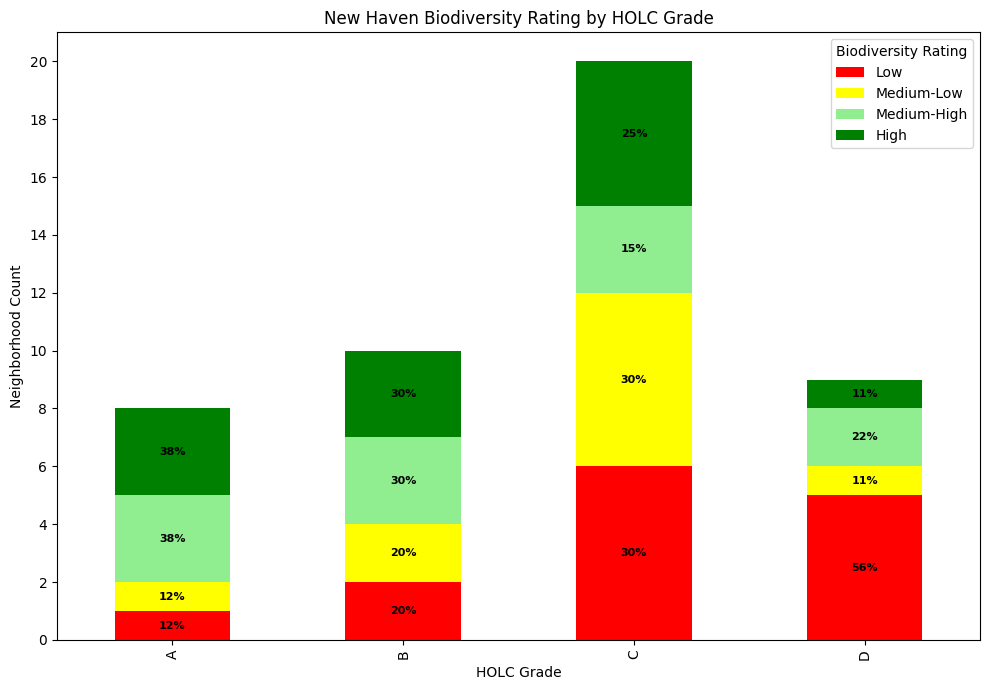

In [ ]:
nh_count_table.plot(
    kind='bar',
    stacked=True,
    figsize=(10,7),
    color=['red', 'yellow', 'lightgreen', 'green']
)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

for i, grade in enumerate(nh_count_table.index):
    y_offset = 0
    for rating in nh_count_table.columns:
        count = nh_count_table.loc[grade, rating]
        proportion = nh_prop_table.loc[grade, rating]

        if count > 0:
            ax.text(
                i,
                y_offset + count/2,
                f'{proportion:.0%}',
                ha='center',
                va='center',
                fontsize=8,
                color='black',
                fontweight='bold'
            )
            y_offset += count


plt.xlabel('HOLC Grade')
plt.ylabel('Neighborhood Count')
plt.title('New Haven Biodiversity Rating by HOLC Grade')
plt.legend(title='Biodiversity Rating')
plt.tight_layout()
plt.show()


To be able to label each neighborhood with its grade we will calculate the centroid of each neighborhood.

In [ ]:
nh_holc_richness['centroid'] = nh_holc_richness.geometry.centroid
nh_holc_richness.head()

<ipython-input-39-2b9718909806>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



,area_id,grade,area,species_richness,species_per_km_square,biodiversity_rating,geometry,centroid
0,3569.0,A,0.309930,7,23,Medium-High,"MULTIPOLYGON (((-72.9 41.36885, -72.90325 41.3...",POINT (-72.90374 41.36781)
1,3568.0,A,0.223315,3,13,Low,"MULTIPOLYGON (((-72.89401 41.36331, -72.89256 ...",POINT (-72.89686 41.36569)
2,3566.0,A,0.916424,27,29,Medium-High,"MULTIPOLYGON (((-72.90981 41.35949, -72.90284 ...",POINT (-72.90815 41.36381)
3,3567.0,A,0.294782,5,17,Medium-Low,"MULTIPOLYGON (((-72.90284 41.35795, -72.8999 4...",POINT (-72.899 41.36137)
4,3564.0,A,0.750634,1749,2330,High,"MULTIPOLYGON (((-72.89801 41.3493, -72.89883 4...",POINT (-72.9028 41.34413)


We are ready to plot our neighborhood boundaries, grade, and biodiversity ratings!

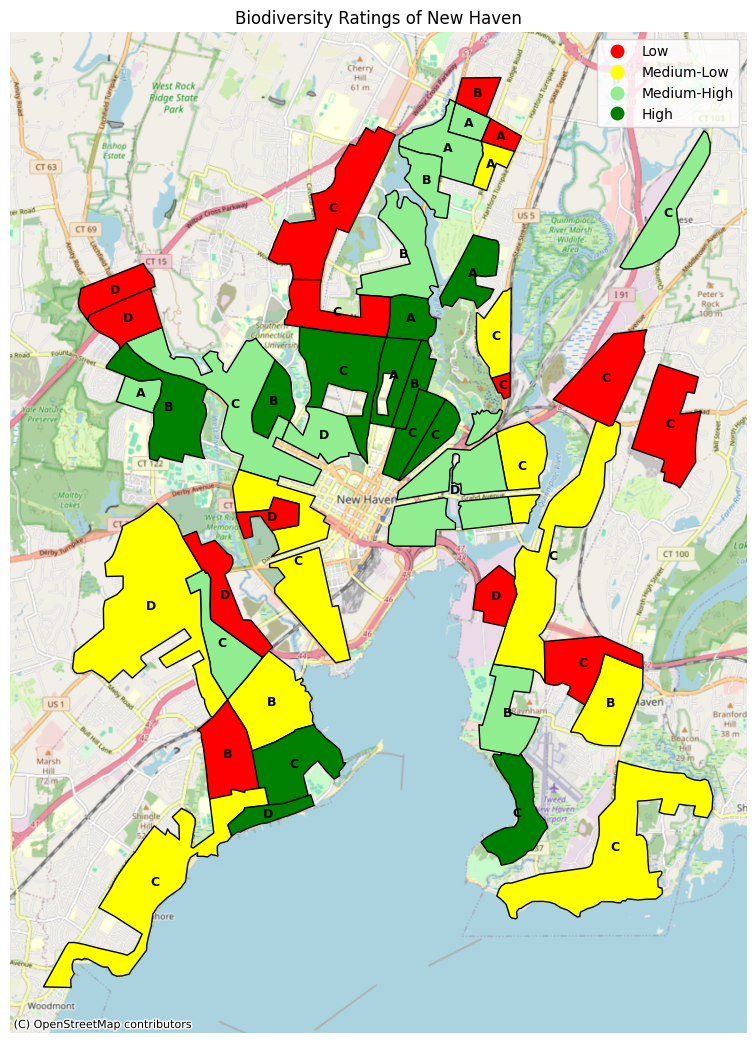

In [ ]:
cmap = ListedColormap(['red', 'yellow', 'lightgreen', 'green'])

ax = nh_holc_richness.plot(figsize = (10,13))
nh_holc_richness.plot(ax=ax, column="biodiversity_rating", cmap=cmap, legend=True, edgecolor = 'black')

for idx, row in nh_holc_richness.iterrows():
    plt.annotate(
        text=row['grade'],
        xy=(row['centroid'].x, row['centroid'].y),
        ha='center',
        va='center',
        fontweight='bold',
        fontsize=9,
        color='black'
    )

ctx.add_basemap(ax = ax, crs=nh_holc_richness.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.title("Biodiversity Ratings of New Haven")
plt.show()

We will do the same visualizations for San Francisco and San Diego!

Here we are counting how many of each biodiversity rating are present in each grade.

In [ ]:
sf_count_table = pd.crosstab(sf_holc_richness['grade'], sf_holc_richness['biodiversity_rating'])
sf_count_table

biodiversity_rating,Low,Medium-Low,Medium-High,High
grade,,,,
A,6,2,4,1
B,9,9,7,11
C,5,8,8,9
D,4,7,5,1


Next we calculate the proportion of each biodiversity rating present in each grade.

In [ ]:
sf_prop_table = sf_count_table.div(sf_count_table.sum(axis=1), axis=0)
sf_prop_table

biodiversity_rating,Low,Medium-Low,Medium-High,High
grade,,,,
A,0.461538,0.153846,0.307692,0.076923
B,0.250000,0.250000,0.194444,0.305556
C,0.166667,0.266667,0.266667,0.300000
D,0.235294,0.411765,0.294118,0.058824


We are ready to create our stacked bar chart!

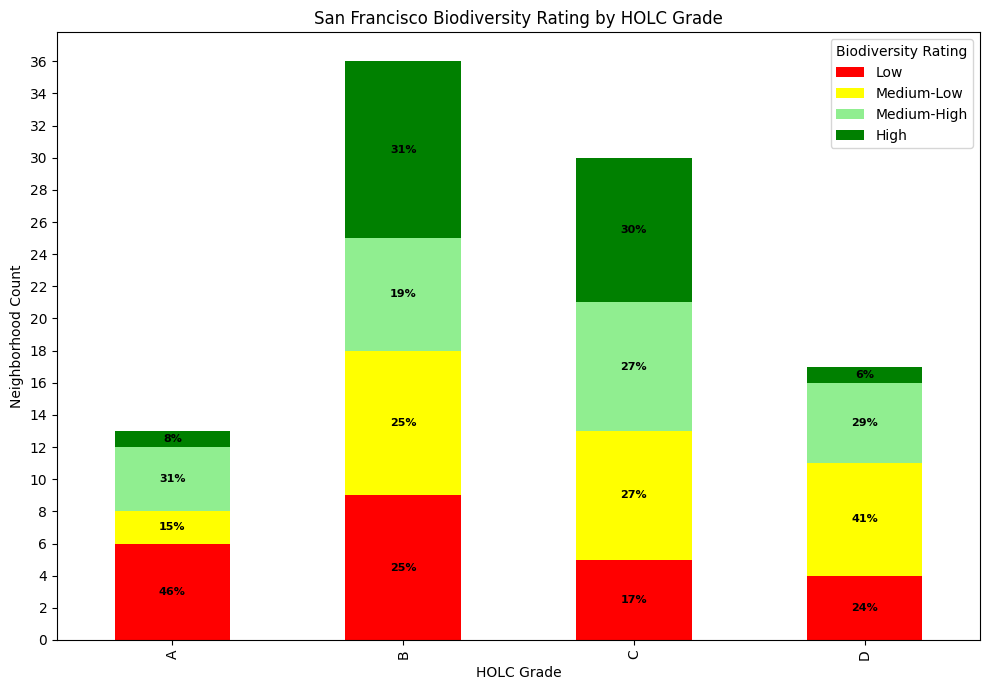

In [ ]:
sf_count_table.plot(
    kind='bar',
    stacked=True,
    figsize=(10,7),
    color=['red', 'yellow', 'lightgreen', 'green']
)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

for i, grade in enumerate(sf_count_table.index):
    y_offset = 0
    for rating in sf_count_table.columns:
        count = sf_count_table.loc[grade, rating]
        proportion = sf_prop_table.loc[grade, rating]

        if count > 0:
            ax.text(
                i,
                y_offset + count/2,
                f'{proportion:.0%}',
                ha='center',
                va='center',
                fontsize=8,
                color='black',
                fontweight='bold'
            )
            y_offset += count


plt.xlabel('HOLC Grade')
plt.ylabel('Neighborhood Count')
plt.title('San Francisco Biodiversity Rating by HOLC Grade')
plt.legend(title='Biodiversity Rating')
plt.tight_layout()
plt.show()


To be able to label each neighborhood with its grade we will calculate the centroid of each neighborhood.

In [ ]:
sf_holc_richness['centroid'] = sf_holc_richness.geometry.centroid
sf_holc_richness.head()

<ipython-input-44-1f191cf4bb43>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



,area_id,grade,area,species_richness,species_per_km_square,biodiversity_rating,geometry,centroid
0,758.0,B,3.443278,148.0,43.0,Low,"MULTIPOLYGON (((-122.46477 37.741, -122.46436 ...",POINT (-122.49671 37.74665)
1,811.0,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.4747 37.73095, -122.47469...",POINT (-122.47331 37.72916)
2,717.0,A,0.519183,90.0,173.0,High,"MULTIPOLYGON (((-122.47554 37.78687, -122.4764...",POINT (-122.48761 37.7868)
3,772.0,A,0.469453,10.0,21.0,Low,"MULTIPOLYGON (((-122.46089 37.73566, -122.4613...",POINT (-122.46582 37.73654)
4,777.0,A,0.323936,27.0,83.0,Medium-High,"MULTIPOLYGON (((-122.45619 37.74046, -122.4568...",POINT (-122.45776 37.73741)


We are ready to plot our neighborhood boundaries, grade, and biodiversity ratings!

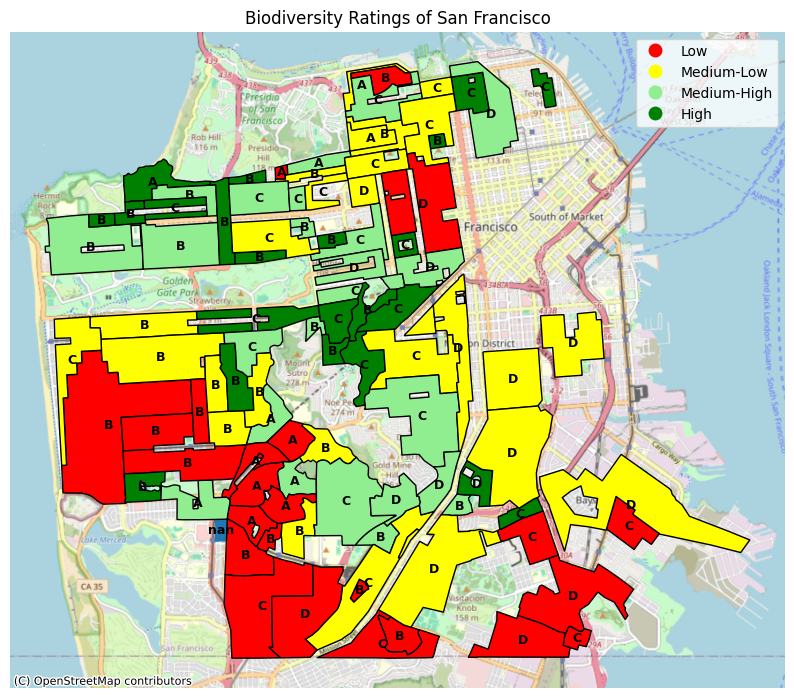

In [ ]:
cmap = ListedColormap(['red', 'yellow', 'lightgreen', 'green'])

ax = sf_holc_richness.plot(figsize = (10,13))
sf_holc_richness.plot(ax=ax, column="biodiversity_rating", cmap=cmap, legend=True, edgecolor = 'black')

for idx, row in sf_holc_richness.iterrows():
    plt.annotate(
        text=row['grade'],
        xy=(row['centroid'].x, row['centroid'].y),
        ha='center',
        va='center',
        fontweight='bold',
        fontsize=9,
        color='black'
    )

ctx.add_basemap(ax = ax, crs=sf_holc_richness.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.title("Biodiversity Ratings of San Francisco")
plt.show()

Here we are counting how many of each biodiversity rating are present in each grade.

In [ ]:
sd_count_table = pd.crosstab(sd_holc_richness['grade'], sd_holc_richness['biodiversity_rating'])
sd_count_table

biodiversity_rating,Low,Medium-Low,Medium-High,High
grade,,,,
A,5,2,4,6
B,2,7,7,11
C,7,9,4,2
D,5,2,3,0


Next we calculate the proportion of each biodiversity rating present in each grade.

In [ ]:
sd_prop_table = sd_count_table.div(sd_count_table.sum(axis=1), axis=0)
sd_prop_table

biodiversity_rating,Low,Medium-Low,Medium-High,High
grade,,,,
A,0.294118,0.117647,0.235294,0.352941
B,0.074074,0.259259,0.259259,0.407407
C,0.318182,0.409091,0.181818,0.090909
D,0.500000,0.200000,0.300000,0.000000


We are ready to create our stacked bar chart!

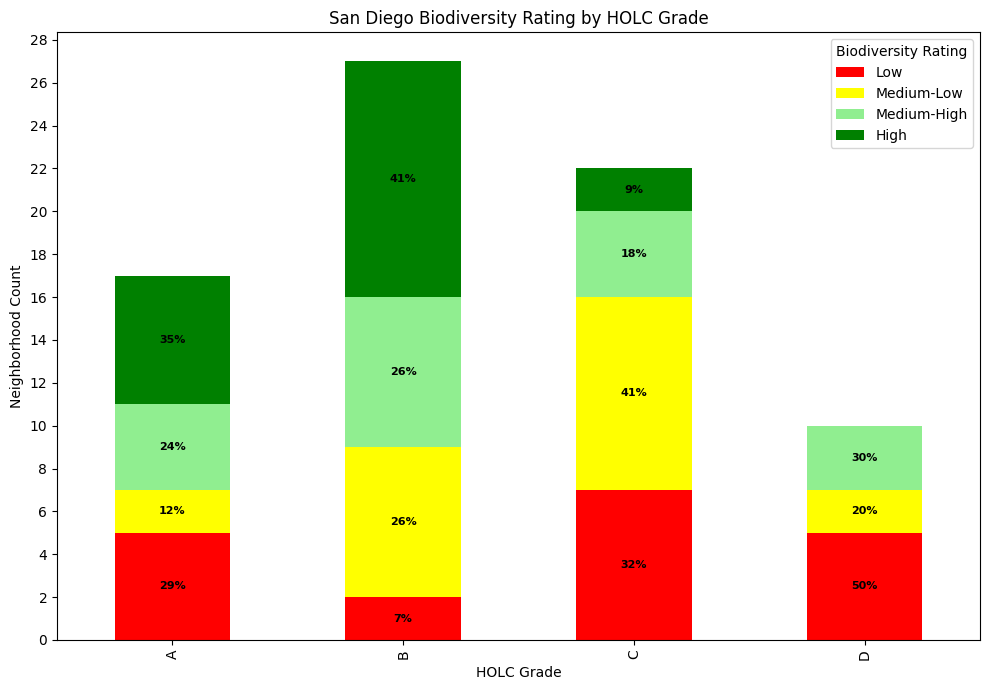

In [ ]:
sd_count_table.plot(
    kind='bar',
    stacked=True,
    figsize=(10,7),
    color=['red', 'yellow', 'lightgreen', 'green']
)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

for i, grade in enumerate(sd_count_table.index):
    y_offset = 0
    for rating in sd_count_table.columns:
        count = sd_count_table.loc[grade, rating]
        proportion = sd_prop_table.loc[grade, rating]

        if count > 0:
            ax.text(
                i,
                y_offset + count/2,
                f'{proportion:.0%}',
                ha='center',
                va='center',
                fontsize=8,
                color='black',
                fontweight='bold'
            )
            y_offset += count


plt.xlabel('HOLC Grade')
plt.ylabel('Neighborhood Count')
plt.title('San Diego Biodiversity Rating by HOLC Grade')
plt.legend(title='Biodiversity Rating')
plt.tight_layout()
plt.show()


To be able to label each neighborhood with its grade we will calculate the centroid of each neighborhood.

In [ ]:
sd_holc_richness['centroid'] = sd_holc_richness.geometry.centroid
sd_holc_richness.head()

<ipython-input-49-96b30dddb7dd>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



,area_id,grade,area,species_richness,species_per_km_square,biodiversity_rating,geometry,centroid
0,703.0,B,1.644718,139,85,Medium-High,"MULTIPOLYGON (((-117.23115 32.7939, -117.23189...",POINT (-117.23879 32.7894)
1,704.0,B,0.982797,333,339,High,"MULTIPOLYGON (((-117.24243 32.70783, -117.2386...",POINT (-117.24388 32.71498)
2,705.0,B,1.349802,96,71,Medium-Low,"MULTIPOLYGON (((-117.24978 32.73303, -117.2556...",POINT (-117.25196 32.72813)
3,706.0,A,0.641598,123,192,High,"MULTIPOLYGON (((-117.2627 32.83302, -117.26343...",POINT (-117.26959 32.82964)
4,707.0,A,1.172925,25,21,Low,"MULTIPOLYGON (((-117.26457 32.81973, -117.2592...",POINT (-117.25948 32.82994)


We are ready to plot our neighborhood boundaries, grade, and biodiversity ratings!

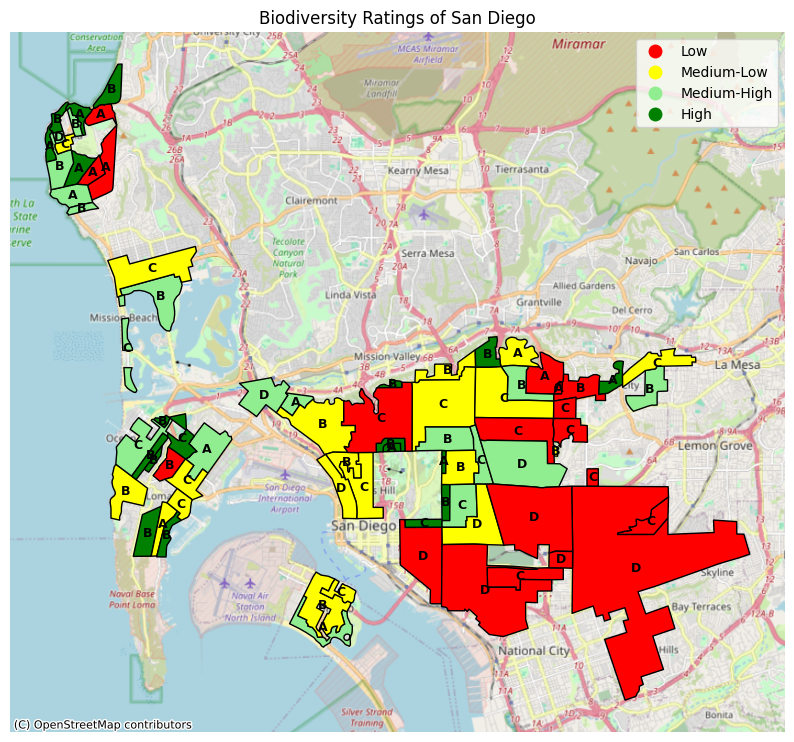

In [ ]:
cmap = ListedColormap(['red', 'yellow', 'lightgreen', 'green'])

ax = sd_holc_richness.plot(figsize = (10,13))
sd_holc_richness.plot(ax=ax, column="biodiversity_rating", cmap=cmap, legend=True, edgecolor = 'black')

for idx, row in sd_holc_richness.iterrows():
    plt.annotate(
        text=row['grade'],
        xy=(row['centroid'].x, row['centroid'].y),
        ha='center',
        va='center',
        fontweight='bold',
        fontsize=9,
        color='black'
    )

ctx.add_basemap(ax = ax, crs=sd_holc_richness.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.title("Biodiversity Ratings of San Diego")
plt.show()

# Research Question Write-Up

As a reminder I was asking these research questions:
* Is there a relationship between redlining and biodiversity?
* Do A-neighborhoods have higher biodiversity than D-neighborhoods?

Let's take a look at what our stacked bar charts are saying.

In New Haven, 38% of A-neighborhoods have a 'High' biodiversity while 11% of D-neighborhoods have a 'High' biodiversity.

In San Francisco, 8% of A-neighborhoods have a 'High' biodiversity while 6% of D-neighborhoods have a 'High' biodiversity.

In San Diego, 35% of A-neighborhoods have a 'High' biodiversity while 0% of D-neighborhoods have a 'High' biodiversity.

In New Haven, the two grades with the highest proportion of 'High' biodiversity neighborhoods are A- and B- neighborhoods.

In San Francisco, the two grades with the highest proportion of 'High' biodiversity neighborhoods are B- and C- neighborhoods.

In San Diego, the two grades with the highest proportion of 'High' biodiversity neighborhoods are A- and B- neighborhoods.

Since A-neighborhoods consistently have higher ratings of 'High' biodiversity than D-neighborhoods and A-neighborhoods for the most part are in the two grades with the highest proportion of 'High' neighborhoods we feel confident suggesting that A-neighborhoods have higher biodiversity than D-neighborhoods.

What our project has shown is that for these 3 cities there in fact is a correlation between being a redlined neighborhood and having a lower biodiversity than a greenlined neighborhood.

These results definitely hint at an intimate relationship between redlining and biodiversity since greenlined neighborhoods generally experience higher biodiversity than redlined neighborhoods. Thus this project would call for further research to be done and for more cities around the US to be considered. Biodiversity is another environmental factor that is a legacy of redlining.  